In [37]:
from matrix import Matrix
from matrix_algorithms import solve_jacobi, solve_gauss_seidel, solve_lu
from helper import get_A, get_B, display_math
import matplotlib.pyplot as plt
import os

index_number = 193044
n = 900 + 10 * (index_number % 100 // 10) + (index_number % 10)
a = get_A(n, 5 + index_number % 1000 // 100, -1, -1)
display_math('A = ' + a.to_latex())
b = get_B(n, (index_number % 10000 // 1000) + 1)
display_math('B = ' + b.to_latex())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
jacobi_result = solve_jacobi(a, b)
gauss_seidel_result = solve_gauss_seidel(a, b)
lu_result = solve_lu(a, b)

In [39]:
print(f'Jacobi method: {jacobi_result.iterations} iterations, {round(jacobi_result.took, 4)} seconds, {jacobi_result.errors[-1]} error')
print(f'Gauss-Seidel method: {gauss_seidel_result.iterations} iterations, {round(gauss_seidel_result.took, 4)} seconds, {gauss_seidel_result.errors[-1]} error')
print(f'LU method: {round(lu_result.took, 4)} seconds, {lu_result.error} error')

Jacobi method: 67 iterations, 11.9212 seconds, 8.830506921606741e-10 error
Gauss-Seidel method: 39 iterations, 6.5236 seconds, 8.212466420029578e-10 error
LU method: 29.992 seconds, 1.9124294068938155e-15 error


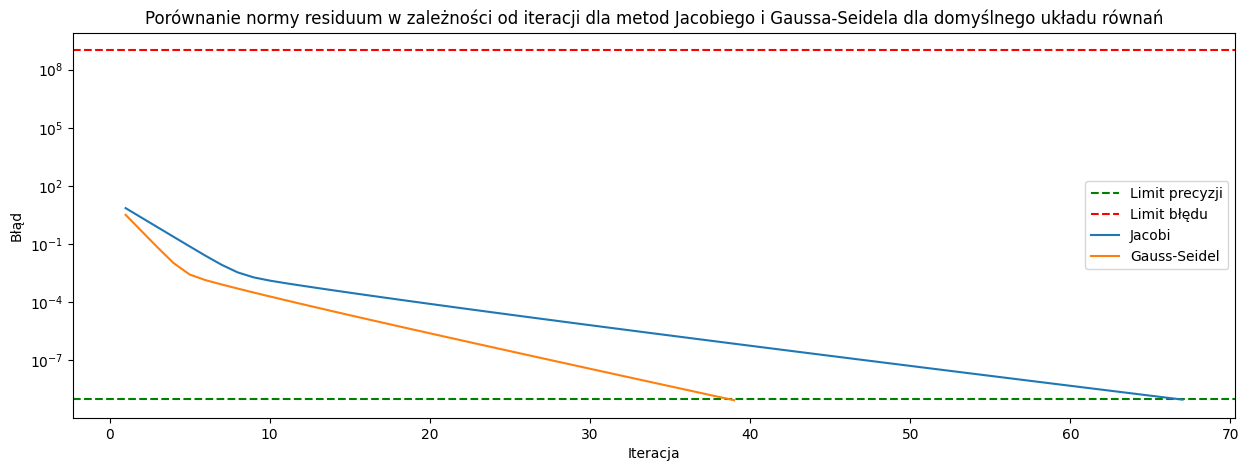

In [40]:
plt.figure(figsize=(15, 5))
plt.yscale('log')
plt.axhline(y=1e-9, color='g', linestyle='--')
plt.axhline(y=1e9, color='r', linestyle='--')
plt.plot(jacobi_result.errors)
plt.plot(gauss_seidel_result.errors)
plt.legend(['Limit precyzji', 'Limit błędu', 'Jacobi', 'Gauss-Seidel'])
plt.xlabel('Iteracja')
plt.ylabel('Błąd')
plt.title('Porównanie normy residuum w zależności od iteracji dla metod Jacobiego i Gaussa-Seidela dla domyślnego układu równań')
plt.savefig('../dist/jacobi-gauss-seidel-default-comparison.svg')

In [41]:
a_alt = get_A(n, 3, -1, -1)
display_math('A = ' + a.to_latex())
b = get_B(n, (index_number % 10000 // 1000) + 1)
display_math('B = ' + b.to_latex())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [42]:
jacobi_result_alt = solve_jacobi(a_alt, b)
gauss_seidel_result_alt = solve_gauss_seidel(a_alt, b)
lu_result_alt = solve_lu(a_alt, b)

In [43]:
print(f'Jacobi method: {jacobi_result_alt.iterations} iterations, {round(jacobi_result_alt.took, 4)} seconds, {round(jacobi_result_alt.errors[-1], 4)} error, {jacobi_result_alt.best()} best')
print(f'Gauss-Seidel method: {gauss_seidel_result_alt.iterations} iterations, {round(gauss_seidel_result_alt.took, 4)} seconds, {round(gauss_seidel_result_alt.errors[-1], 4)} error, {gauss_seidel_result_alt.best()} best')
print(f'LU method: {round(lu_result_alt.took, 4)} seconds, {lu_result_alt.error} error')

Jacobi method: 93 iterations, 16.5685 seconds, 894576398.9636 error, (9, 0.18136286954970482) best
Gauss-Seidel method: 36 iterations, 6.1769 seconds, 596229785.312 error, (3, 0.28223629372829717) best
LU method: 30.2248 seconds, 6.13589416330441e-13 error


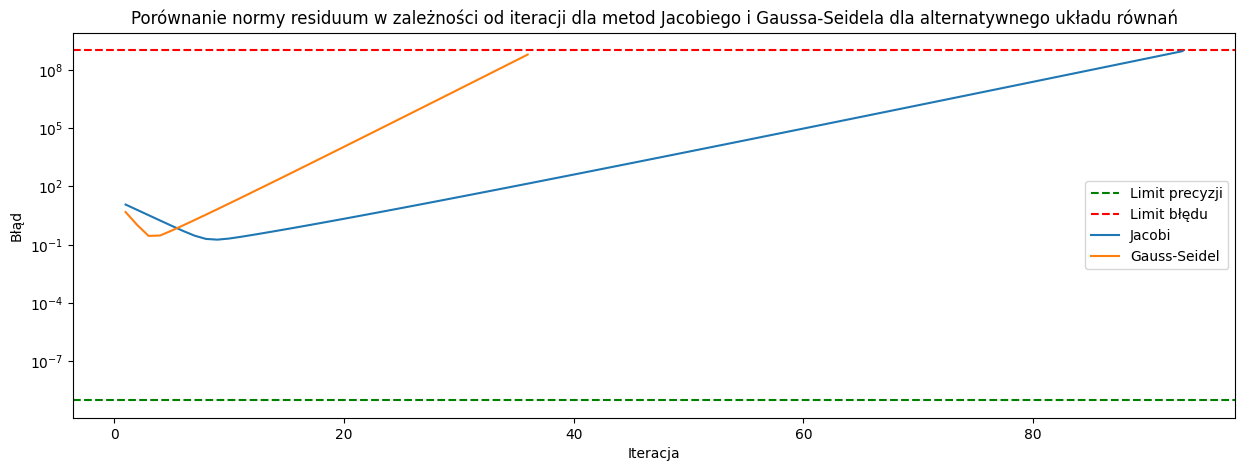

In [44]:
plt.figure(figsize=(15, 5))
plt.yscale('log')
plt.axhline(y=1e-9, color='g', linestyle='--')
plt.axhline(y=1e9, color='r', linestyle='--')
plt.plot(jacobi_result_alt.errors)
plt.plot(gauss_seidel_result_alt.errors)
plt.legend(['Limit precyzji', 'Limit błędu', 'Jacobi', 'Gauss-Seidel'])
plt.xlabel('Iteracja')
plt.ylabel('Błąd')
plt.title('Porównanie normy residuum w zależności od iteracji dla metod Jacobiego i Gaussa-Seidela dla alternatywnego układu równań')
plt.savefig('../dist/jacobi-gauss-seidel-alternative-comparison.svg')

In [46]:
class Result:
    def __init__(self, size, jacobi, gauss_seidel, lu):
        self.size = size
        self.jacobi = jacobi
        self.gauss_seidel = gauss_seidel
        self.lu = lu
#Takes 32 min
sizes = [100, 500, 1000, 1500, 2000, 2500, 3000]
results = []
for size in sizes:
    print(f'{size}x{size} matrix started')
    size_a = get_A(size, 5 + index_number % 1000 // 100, -1, -1)
    size_b = get_B(size, (index_number % 10000 // 1000) + 1)
    tmp_jacobi = solve_jacobi(size_a, size_b)
    tmp_gauss_seidel = solve_gauss_seidel(size_a, size_b)
    tmp_lu = solve_lu(size_a, size_b)
    results.append(Result(size, tmp_jacobi, tmp_gauss_seidel, tmp_lu))
    print(f'{size}x{size} matrix done')

100x100 matrix started
100x100 matrix done
500x500 matrix started
500x500 matrix done
1000x1000 matrix started
1000x1000 matrix done
2000x2000 matrix started
2000x2000 matrix done
3000x3000 matrix started
3000x3000 matrix done


In [90]:
from collections import namedtuple
import json

# jacobi_execution_times = [(result.size, result.jacobi.took) for result in results]
# gauss_seidel_execution_times = [(result.size, result.gauss_seidel.took) for result in results]
# lu_execution_times = [(result.size, result.lu.took) for result in results]
# ExportModel = namedtuple('ExportModel', ['jacobi_execution_times', 'gauss_seidel_execution_times', 'lu_execution_times'])
# export_model = ExportModel(jacobi_execution_times, gauss_seidel_execution_times, lu_execution_times)
# json.dump(export_model, open('../dist/execution_times.json', 'w'))

loaded_results = json.load(open('../dist/execution_times.json', 'r'))
jacobi_execution_times = loaded_results[0]
gauss_seidel_execution_times = loaded_results[1]
lu_execution_times = loaded_results[2]


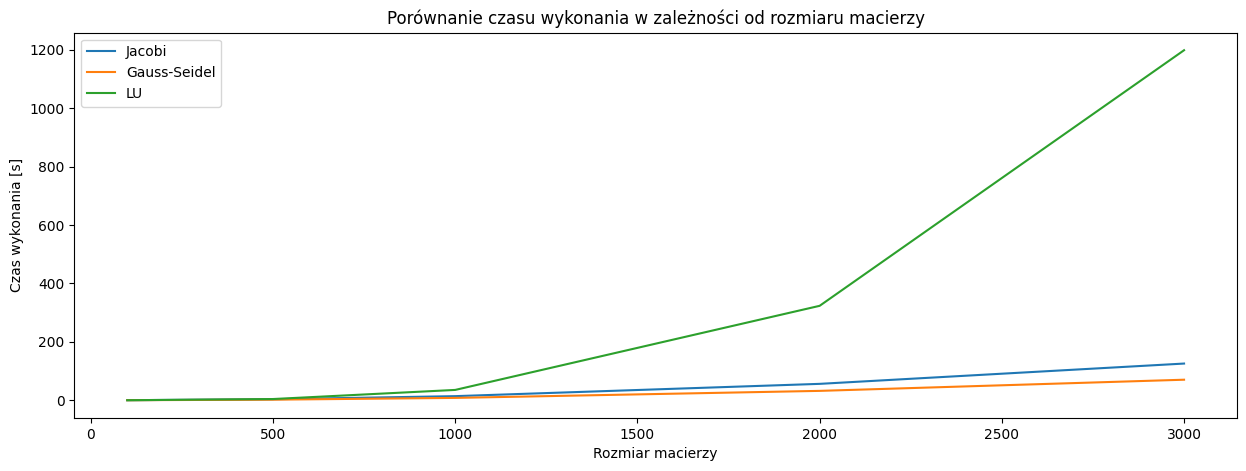

In [108]:
jacobi_execution_time_data = zip(*[(lst[0], lst[1]) for lst in jacobi_execution_times])
gauss_seidel_execution_time_data = zip(*[(lst[0], lst[1]) for lst in gauss_seidel_execution_times])
lu_execution_time_data = zip(*[(lst[0], lst[1]) for lst in lu_execution_times])

plt.figure(figsize=(15, 5))
plt.plot(*jacobi_execution_time_data)
plt.plot(*gauss_seidel_execution_time_data)
plt.plot(*lu_execution_time_data)
plt.legend(['Jacobi', 'Gauss-Seidel', 'LU'])
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Czas wykonania [s]')
plt.title('Porównanie czasu wykonania w zależności od rozmiaru macierzy')
plt.savefig('../dist/jacobi-gauss-seidel-lu-time-comparison.svg')